In [13]:
# https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
class DepressionDataset():
    """Face Landmarks dataset."""

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        with open(csv_file, 'r') as file:
            self.lines = file.readlines()
        self.transform = transform

    def __len__(self):
        return len(self.lines)

    def __getitem__(self, idx):
        idx = len(self.lines)

        for i in range(idx):
            info = self.lines[i].rstrip()
            par_name = info.split(" ")[0]
            label = info.split(" ")[1]
            imgs = os.listdir(par_name)
            imgs.sort()
            for img in range(idx):
                img_path = par_name+"/"+imgs[img]
                image = io.imread(img_path)
                sample = {'image': image, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
# face_dataset = FaceLandmarksDataset(csv_file='data/faces/face_landmarks.csv',
#                                     root_dir='data/faces/')

# fig = plt.figure()

# for i in range(len(face_dataset)):
#     sample = face_dataset[i]

#     print(i, sample['image'].shape, sample['landmarks'].shape)

#     ax = plt.subplot(1, 4, i + 1)
#     plt.tight_layout()
#     ax.set_title('Sample #{}'.format(i))
#     ax.axis('off')
#     show_landmarks(**sample)

#     if i == 3:
#         plt.show()
#         break
        

In [18]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
from skimage import io, transform

In [19]:
EXP_TYPE = 'Classification/'
textMAIN = '/timo/datasets/Dua/GRU-test/Data-Combinations/'
textPATH = textMAIN+EXP_TYPE
COMB = ['BDI','AVEC','AVEC-BDI','AVEC-TEST','BDI-TEST']
NUM = ['1','2','3','4','5']
trainlist=textPATH+COMB[0]+'train'+NUM[0]+'.txt'

In [20]:
x = DepressionDataset(csv_file = trainlist)

0 (80, 90, 3) 1
1 (80, 90, 3) 1
2 (80, 90, 3) 1
3 (80, 90, 3) 1


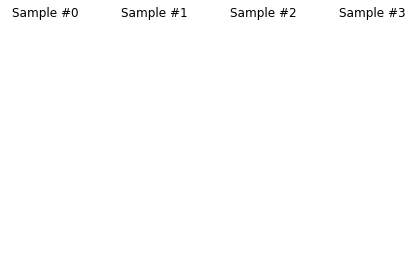

In [23]:
fig = plt.figure()

for i in range(len(x)):
    sample = x[i]

    print(i, sample['image'].shape, sample['label'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    if i == 3:
        plt.show()
        break

In [ ]:
# csv_file = ''
with open(trainlist, 'r') as file:
    lines = file.readlines()

for i in range(len(lines)):
    imgpath = lines[i].rstrip()
    img_path = imgpath.split(" ")[0]
#     print(img_path)
    label = imgpath.split(" ")[1]
    imgs = os.listdir(img_path)
    imgs.sort()
    for img in range(len(imgs)):
        full_path = img_path+"/"+imgs[img]
        image = io.imread(full_path)
        sample = {'image': image, 'label': label}
        print(image.shape)
# if label == 0: 
#     print(image)

#         print(img_path+"/"+imgs[img], label)